In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
date_list = pd.date_range('2020-07-01', periods=100, freq='D')

In [3]:
movie_title = []
movie_point =[]
movie_date = []

In [4]:
for today in date_list:
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&date=" + today.strftime('%Y%m%d')
    html = urlopen(url)
    
    soup = BeautifulSoup(html.read(), 'html.parser')
    
    titles = soup.find_all('div', {'class':'tit5'})
    points = soup.find_all('td', {'class':'point'})
    
    t_text =[]
    p_text = []
    date = []
        
    for t, p in zip(titles,points):
        t_text.append(t.text.strip(' \n'))
        p_text.append(float(p.text))
        date.append(today)
    movie_title += t_text
    movie_point += p_text
    movie_date += date

In [5]:
print(movie_title[:5])

['그린 북', '가버나움', '베일리 어게인', '원더', '포드 V 페라리']


In [9]:
frame = pd.DataFrame({'date':movie_date, 'title':movie_title, 'point':movie_point})
frame

,date,title,point
0,2020-07-01,그린 북,9.59
1,2020-07-01,가버나움,9.59
2,2020-07-01,베일리 어게인,9.53
3,2020-07-01,원더,9.49
4,2020-07-01,포드 V 페라리,9.49
...,...,...,...
4995,2020-10-08,쉰들러 리스트,9.36
4996,2020-10-08,클레멘타인,9.36
4997,2020-10-08,안녕 베일리,9.36
4998,2020-10-08,서유기 2 - 선리기연,9.36


In [19]:
expr = "title == ['토이 스토리 3']"
search_movie = frame.query(expr)
print(search_movie)

           date     title  point
28   2020-07-01  토이 스토리 3   9.38
77   2020-07-02  토이 스토리 3   9.38
127  2020-07-03  토이 스토리 3   9.38
178  2020-07-04  토이 스토리 3   9.38
228  2020-07-05  토이 스토리 3   9.38
...         ...       ...    ...
4781 2020-10-04  토이 스토리 3   9.39
4831 2020-10-05  토이 스토리 3   9.39
4881 2020-10-06  토이 스토리 3   9.39
4931 2020-10-07  토이 스토리 3   9.39
4981 2020-10-08  토이 스토리 3   9.39

[100 rows x 3 columns]


In [15]:
# expr = "title == ['토이 스토리 3', '그린 북']"
# search_movie = frame.query(expr)
# print(search_movie)

           date     title  point
0    2020-07-01      그린 북   9.59
28   2020-07-01  토이 스토리 3   9.38
50   2020-07-02      그린 북   9.59
77   2020-07-02  토이 스토리 3   9.38
100  2020-07-03      그린 북   9.59
...         ...       ...    ...
4881 2020-10-06  토이 스토리 3   9.39
4900 2020-10-07      그린 북   9.59
4931 2020-10-07  토이 스토리 3   9.39
4950 2020-10-08      그린 북   9.59
4981 2020-10-08  토이 스토리 3   9.39

[200 rows x 3 columns]


토이 스토리 3


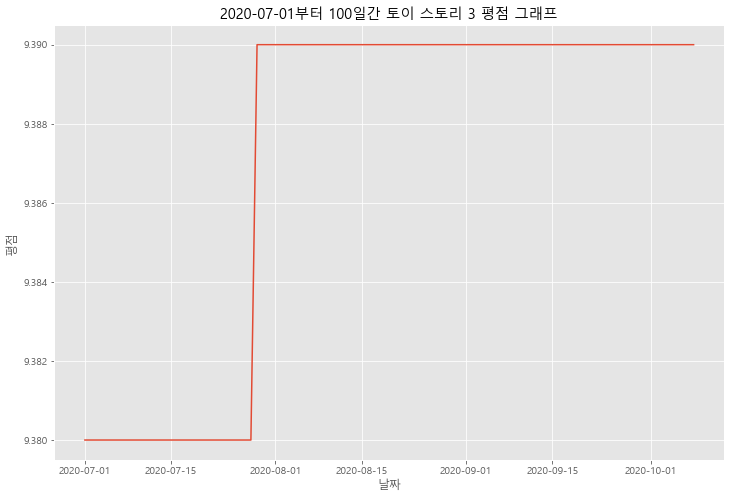

In [24]:
import matplotlib.pyplot as plt

input_title = input()
search_movie = frame.query("title == ['{}']".format(input_title))


plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.title('2020-07-01부터 100일간 {} 평점 그래프'.format(input_title))
plt.plot(search_movie['date'], search_movie['point'])
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()